# UCCD2063 AIT Assignment (Group 50)
## Lecturer: Dr.Ng Hui Fuang 

### TABLE OF CONTENT
2. [SECTION 2.0: Method](#2.0-Method)
    1. [SECTION 2.1: Data  Exploration & Data Visualisation](#2.1-Data-Exploration-and-Visualization)
        1. [2.1.1: CATEGORICAL DATA VISUALIZATION](#2.1.1-CATEGORICAL-DATA-VISUALIZATION)
        2. [2.1.2: NUMERICAL DATA VISUALIZATION](#2.1.2-NUMERICAL-DATA-VISUALIZATION)
    2. [SECTION 2.2: Data Pre-processing](#2.2-DATA-PREPROCESSING)
        1. [2.2.1: REMOVE / CHANGE IRRELEVANT DATA](#2.2.1-REMOVE-/-CHANGE-IRRELEVANT-DATA)
        2. [2.2.2: Seperate X and Y](#2.2.2-Seperate-X-and-Y)
        3. [2.2.3: Split Data into Training Set & Test Set](#2.2.3-Split-Data-into-Training-Set-&-Test-Set)
        4. [2.2.4: Preprocessing Training Set and Test Set](#2.2.4-Preprocessing-Training-Set-and-Test-Set)
    4. [SECTION 2.3: Model Training, Validation, Fine Tuning & Testing](#2.3-Model-Training,-Validation,-Fine-Tuning-&-Testing)
        1. [2.3.1: K-Nearest Neighbour](#2.3.1-K-Nearest-Neighbour)
        2. [2.3.2: RANDOM FOREST CLASSIFIER](#2.3.2-RANDOM-FOREST-CLASSIFIER)
        3. [2.3.3: Gradient Boosting Classifier](#2.3.3-Gradient-Boosting-Classifier)
        4. [2.3.4: XGBoost Classifier](#2.3.4-XGBoost-Classifier)

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.1 Data Exploration and Visualization

In [349]:
df = pd.read_csv('dataset.csv')
pd.set_option('display.max_columns',None)
df

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Male,18,175.0,86.4,yes,low,yes,3,3,Sometimes,no,2.74,bus,1,rare,6708,no,medium
2096,Male,20,177.0,70.0,yes,low,yes,1,1,Sometimes,no,2.00,bus,1,moderate,13716,no,low
2097,Male,19,176.0,79.0,yes,medium,yes,2,3,Frequently,no,3.00,bus,1,often,4347,no,medium
2098,Male,22,170.0,95.6,yes,none,yes,2,3,Sometimes,no,2.00,bus,0,rare,1376,no,high


In [350]:
df.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [351]:
df.isnull().sum()

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [354]:
cat_features=df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_features)

['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline', 'Cardiovascular_risk(y)']


In [355]:
num_features = df.select_dtypes(include=['int64','float64']).columns
print(num_features)

Index(['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day',
       'Water_intake(L)', 'Exercise', 'Income'],
      dtype='object')


## 2.1.1 CATEGORICAL DATA VISUALIZATION

In [357]:
#1
df.Gender.value_counts()

Gender
Male      1060
Female    1040
Name: count, dtype: int64

In [358]:
#2
df.Age.value_counts()

Age
21    236
23    216
26    212
18    210
19    169
22    163
20    148
24     95
25     82
17     69
31     61
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
16     20
28     20
40     19
41     18
35     18
44      6
36      6
42      6
55      5
45      3
43      3
51      2
46      2
52      1
61      1
15      1
56      1
48      1
47      1
14      1
Name: count, dtype: int64

In [359]:
#3
df['Height(cm)'].value_counts()

Height(cm)
170.0    73
165.0    58
160.0    48
175.0    44
162.0    38
         ..
191.5     1
163.6     1
172.8     1
157.7     1
145.6     1
Name: count, Length: 390, dtype: int64

In [360]:
#4
df['Weight(kg)'].value_counts()

Weight(kg)
80.0     63
50.0     44
70.0     44
75.0     41
60.0     38
         ..
129.4     1
85.5      1
104.0     1
72.9      1
95.6      1
Name: count, Length: 684, dtype: int64

In [361]:
#5
df.Family_history.value_counts()

Family_history
yes    1715
no      385
Name: count, dtype: int64

In [362]:
#6
df.Alcohol.value_counts()

Alcohol
low       1394
none       635
medium      70
high         1
Name: count, dtype: int64

In [363]:
#7
df.Junk_food.value_counts()

Junk_food
yes    1855
no      245
Name: count, dtype: int64

In [364]:
#8
df.Vege_day.value_counts()

Vege_day
2    1007
3     991
1     102
Name: count, dtype: int64

In [365]:
#9
df.Meals_day.value_counts()

Meals_day
3    1462
1     315
2     175
4     148
Name: count, dtype: int64

In [366]:
#10
df.Snack.value_counts()

Snack
Sometimes     1754
Frequently     242
Always          53
No              51
Name: count, dtype: int64

In [367]:
#11
df.Smoking.value_counts()

Smoking
no     2056
yes      44
Name: count, dtype: int64

In [368]:
#12
df['Water_intake(L)'].value_counts()

Water_intake(L)
2.00    464
1.00    221
3.00    163
2.17     16
2.04     15
       ... 
1.47      2
1.50      2
1.26      1
1.58      1
1.74      1
Name: count, Length: 201, dtype: int64

In [369]:
#13
df.Transportation.value_counts()

Transportation
bus           1573
car            454
walk            56
motorcycle      11
bicycle          6
Name: count, dtype: int64

In [370]:
#14
df.Exercise.value_counts()

Exercise
1    773
0    716
2    493
3    118
Name: count, dtype: int64

In [371]:
#15
df.TV.value_counts()

TV
rare        947
moderate    910
often       243
Name: count, dtype: int64

In [372]:
#16
df.Income.value_counts()

Income
3404     4
13360    3
14969    3
16005    3
17313    3
        ..
13145    1
16400    1
13665    1
12639    1
9051     1
Name: count, Length: 1967, dtype: int64

In [373]:
#17
df.Discipline.value_counts()

Discipline
no     2004
yes      96
Name: count, dtype: int64

In [374]:
#18
df['Cardiovascular_risk(y)'].value_counts()

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64

## 2.1.2 NUMERICAL DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

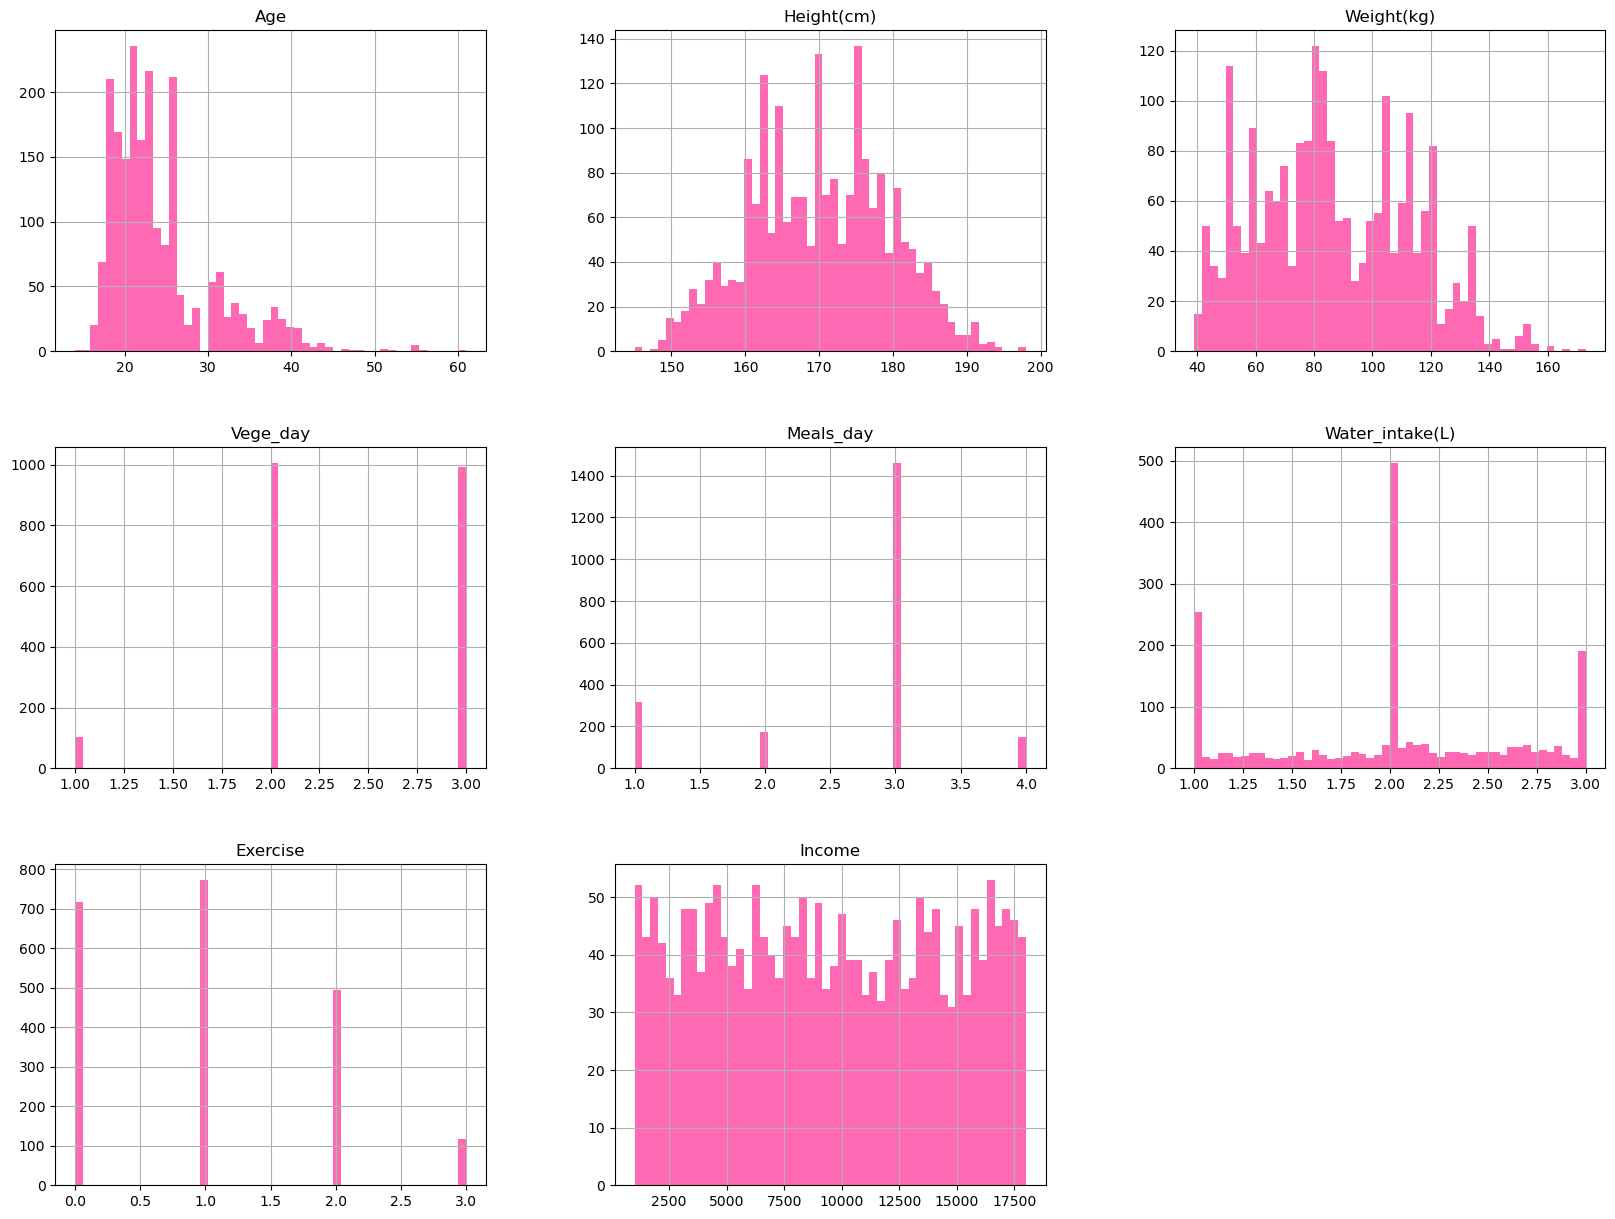

In [376]:
df.hist(bins=50,figsize=(20,15),color='hotpink')
plt.show

# 2.2 DATA PREPROCESSING
## 2.2.1 REMOVE / CHANGE IRRELEVANT DATA

Remove Irrelevant Data:
- Income : Does not give any insight towards if one have cardiovascular risk or not 
- Height & Weight : Individually is hard to be used to do prediction with (Convert to BMI)

In [379]:
df = df.drop(['Income'], axis=1)



Convert Height & Weight To BMI

In [381]:
# Combine Height and weight into BMI
df['BMI'] = df['Weight(kg)'] / (df['Height(cm)'] / 100) ** 2
print(df[['Height(cm)', 'Weight(kg)', 'BMI']].head())

conditions = [
    (df['BMI'] < 18.5),
    ((df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)),
    ((df['BMI'] > 24.9) & (df['BMI'] <= 28.0)),
    (df['BMI'] > 28.0)
]
categories = ['underweight', 'healthy weight', 'overweight', 'obesity']
df['BMI_Category'] = np.select(conditions, categories)
df = df.drop(['BMI', 'Height(cm)', 'Weight(kg)'], axis=1)

   Height(cm)  Weight(kg)        BMI
0       172.2        82.9  27.956850
1       175.3        80.0  26.033116
2       158.3        81.9  32.683012
3       165.0        70.0  25.711662
4       169.0        75.0  26.259585


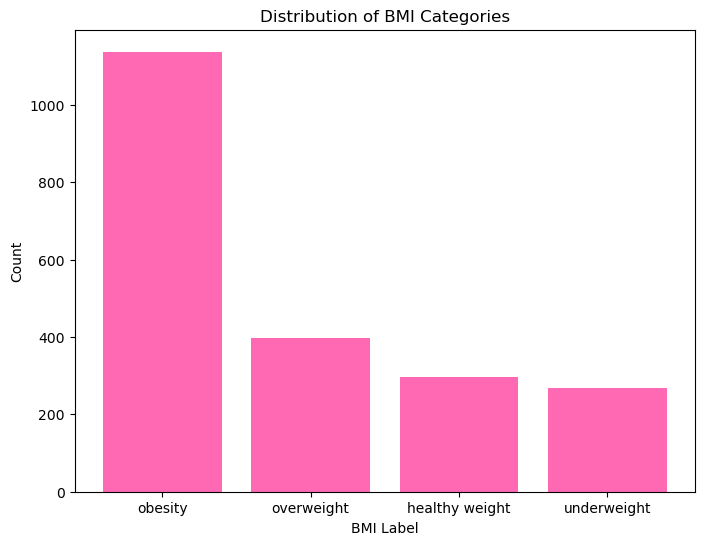

In [382]:
import matplotlib.pyplot as plt

# Calculate the value counts for the BMI categories
category_counts = df['BMI_Category'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color='hotpink')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Label')
plt.ylabel('Count')

# Display the plot
plt.show()


## 2.2.2 Seperate X and Y

In [384]:
X = df.drop('Cardiovascular_risk(y)',axis=1)
y=df['Cardiovascular_risk(y)'].replace({'low' : 0, 'medium' : 1,'high':2})
print(X.shape)
print(y.shape)

(2100, 15)
(2100,)


C:\Users\tanch\AppData\Local\Temp\ipykernel_16792\2755580794.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=df['Cardiovascular_risk(y)'].replace({'low' : 0, 'medium' : 1,'high':2})


## 2.2.3 Split Data into Training Set & Test Set

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.info)
print(y_train.info)

(1680, 15)
(420, 15)
(1680,)
(420,)
<bound method DataFrame.info of       Gender  Age Family_history Alcohol Junk_food  Vege_day  Meals_day  \
1592    Male   37            yes     low       yes         2          2   
829   Female   20            yes     low       yes         3          3   
414     Male   31            yes     low       yes         2          2   
704     Male   18            yes    none       yes         3          4   
755   Female   29            yes     low       yes         2          3   
...      ...  ...            ...     ...       ...       ...        ...   
1638    Male   27            yes     low       yes         3          3   
1095    Male   25            yes     low       yes         1          3   
1130  Female   34             no     low       yes         3          1   
1294  Female   24            yes     low       yes         3          3   
860     Male   23            yes     low       yes         2          3   

          Snack Smoking  Water_

## 2.2.4 Preprocessing Training Set and Test Set

In [386]:
X_train_cat = X_train.drop(['Age','Water_intake(L)', 'Vege_day', 'Meals_day', 'Exercise'], axis=1)
X_train_num = X_train[['Age','Water_intake(L)','Vege_day', 'Meals_day', 'Exercise']]

X_test_cat = X_test.drop(['Age','Water_intake(L)', 'Vege_day', 'Meals_day', 'Exercise'], axis=1)
X_test_num = X_test[['Age','Water_intake(L)','Vege_day', 'Meals_day', 'Exercise']]

print(X_train_cat.info)
print(X_train_num.info)

<bound method DataFrame.info of       Gender Family_history Alcohol Junk_food      Snack Smoking  \
1592    Male            yes     low       yes  Sometimes      no   
829   Female            yes     low       yes  Sometimes      no   
414     Male            yes     low       yes  Sometimes      no   
704     Male            yes    none       yes  Sometimes      no   
755   Female            yes     low       yes  Sometimes      no   
...      ...            ...     ...       ...        ...     ...   
1638    Male            yes     low       yes  Sometimes      no   
1095    Male            yes     low       yes  Sometimes      no   
1130  Female             no     low       yes  Sometimes      no   
1294  Female            yes     low       yes  Sometimes      no   
860     Male            yes     low       yes  Sometimes      no   

     Transportation        TV Discipline    BMI_Category  
1592            car      rare         no         obesity  
829             bus  moderate    

In [387]:
print('X_train_num shape: ',X_train_num.shape)
print('X_train_cat shape: ',X_train_cat.shape)
print('X_test_num shape: ',X_test_num.shape)
print('X_test_cat shape: ',X_test_cat.shape)

X_train_num shape:  (1680, 5)
X_train_cat shape:  (1680, 10)
X_test_num shape:  (420, 5)
X_test_cat shape:  (420, 10)


### Standardization

In [388]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_tr = X_train_num.copy()
scaler.fit(X_train_num_tr)
X_train_num_tr = scaler.transform(X_train_num_tr)

X_test_num_tr = X_test_num.copy()
scaler.transform(X_test_num)

print(X_train_num_tr.mean (axis=0))
print(X_train_num_tr.std (axis=0))

print(X_test_num_tr.mean (axis=0))
print(X_test_num_tr.std (axis=0))

[-1.69176842e-17  3.93336157e-16  6.34413157e-18 -2.64338815e-16
  1.69969858e-16]
[1. 1. 1. 1. 1.]
Age                23.952381
Water_intake(L)     1.933095
Vege_day            2.395238
Meals_day           2.650000
Exercise            0.911905
dtype: float64
Age                5.907208
Water_intake(L)    0.600157
Vege_day           0.599105
Meals_day          0.822636
Exercise           0.870822
dtype: float64


### One Hot Encoder

In [389]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the categorical data
X_train_cat_tr = encoder.fit_transform(X_train_cat)
X_test_cat_tr = encoder.transform(X_test_cat)

X_test_num_tr = scaler.transform(X_test_num)  # Correct transformation

# Convert the result to a DataFrame with appropriate column names
X_train_cat_tr = pd.DataFrame(X_train_cat_tr, columns=encoder.get_feature_names_out(X_train_cat.columns))
X_test_cat_tr = pd.DataFrame(X_test_cat_tr, columns=encoder.get_feature_names_out(X_test_cat.columns))

In [390]:
X_train_tr = pd.concat([pd.DataFrame(X_train_num_tr, columns=X_train_num.columns).reset_index(drop=True),
                           X_train_cat_tr.reset_index(drop=True)], axis=1)

X_test_tr = pd.concat([pd.DataFrame(X_test_num_tr, columns=X_test_num.columns).reset_index(drop=True),
                          X_test_cat_tr.reset_index(drop=True)], axis=1)

In [391]:
print('X_test_num_tr shape: ', X_test_num_tr.shape)
print('X_test_cat_tr shape: ', X_test_cat_tr.shape)

X_test_num_tr shape:  (420, 5)
X_test_cat_tr shape:  (420, 20)


# 2.3 Model Training, Validation, Fine Tuning & Testing

## 2.3.1 K-Nearest Neighbour

#### Initialize and fit the KNN model to the training data

In [394]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tr, y_train)

print("KNN model has been fitted.")

KNN model has been fitted.


#### Predict

In [396]:
y_pred = knn.predict(X_train_tr)

print("Predictions on the test set:")
print(y_pred[:10])

Predictions on the test set:
[2 2 2 0 1 1 2 0 2 2]


#### Model Evaluation

##### a. Classification Report (precision, recall, f1)

In [399]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_train, y_pred,digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9684    0.9089    0.9377       439
           1     0.9317    0.9009    0.9160       454
           2     0.9373    0.9873    0.9616       787

    accuracy                         0.9435      1680
   macro avg     0.9458    0.9324    0.9385      1680
weighted avg     0.9439    0.9435    0.9431      1680



##### b. Confusion Matrix

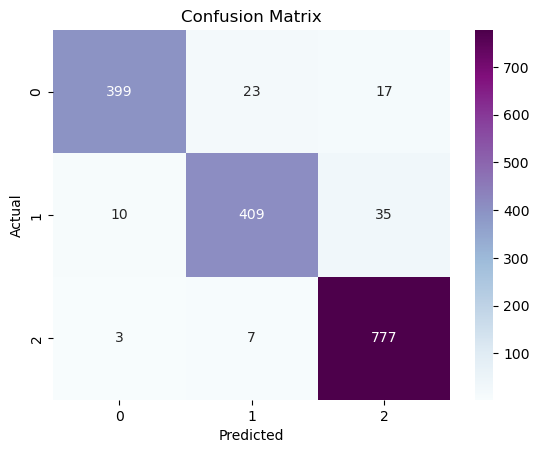

In [401]:
conf_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

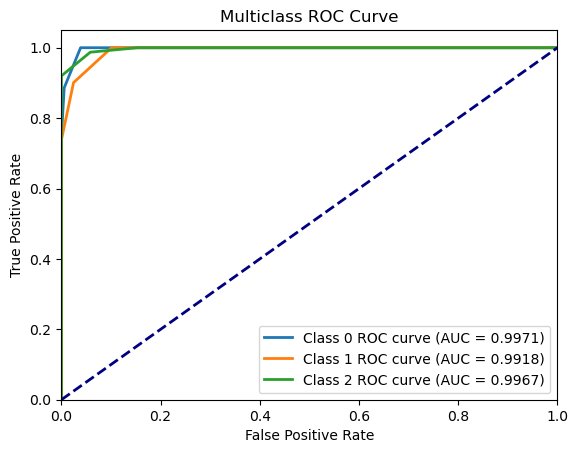

In [402]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_train_bin = label_binarize(y_train, classes=np.arange(len(np.unique(y_train))))
n_classes = y_train_bin.shape[1]

y_prob = knn.predict_proba(X_train_tr)
knn.fit(X_train_tr, y_train)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

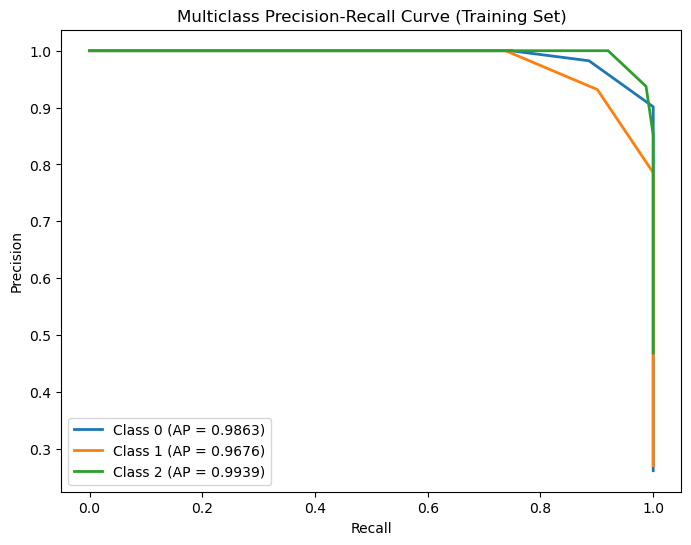

Average Precision for Class 0 (Training Set): 0.9863
Average Precision for Class 1 (Training Set): 0.9676
Average Precision for Class 2 (Training Set): 0.9939


In [403]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_train))
y_train_onehot = label_binarize(y_train, classes=[0, 1, 2])

y_train_score = knn.predict_proba(X_train_tr)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_onehot[:, i], y_train_score[:, i])
    average_precision[i] = average_precision_score(y_train_onehot[:, i], y_train_score[:, i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.4f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (Training Set)")
plt.legend(loc="best")
plt.show()

for i in range(n_classes):
    print(f"Average Precision for Class {i} (Training Set): {average_precision[i]:.4f}")

#### 5 fold validation

In [405]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_train_tr, y_train, cv=5)

print("Cross-validation scores:", [f"{score:.4f}" for score in cv_scores])
print("Average cross-validation score:", f"{np.mean(cv_scores):.4f}")

Cross-validation scores: ['0.8988', '0.8690', '0.8810', '0.8780', '0.8810']
Average cross-validation score: 0.8815


#### Grid Search

In [407]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tr, y_train)

print("Best parameters found by Grid Search:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters found by Grid Search: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.9173


#### Finetuning model (After Grid Search)
##### a. test with different values of k

In [409]:
neighbors_range = [3, 5, 7, 9, 11]

for k in neighbors_range:
    print(f"Evaluating KNN with k={k}")
    
    # Reinitialize and fit the model with new n_neighbors value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tr, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_train_tr)
    
    # Evaluate and print the classification report
    print(f"Classification Report for k={k}:")
    print(classification_report(y_train, y_pred,digits=4))
    print("\n")

Evaluating KNN with k=3
Classification Report for k=3:
              precision    recall  f1-score   support

           0     0.9684    0.9089    0.9377       439
           1     0.9317    0.9009    0.9160       454
           2     0.9373    0.9873    0.9616       787

    accuracy                         0.9435      1680
   macro avg     0.9458    0.9324    0.9385      1680
weighted avg     0.9439    0.9435    0.9431      1680



Evaluating KNN with k=5
Classification Report for k=5:
              precision    recall  f1-score   support

           0     0.9751    0.8929    0.9322       439
           1     0.9335    0.8656    0.8983       454
           2     0.9113    0.9924    0.9501       787

    accuracy                         0.9321      1680
   macro avg     0.9400    0.9170    0.9269      1680
weighted avg     0.9340    0.9321    0.9314      1680



Evaluating KNN with k=7
Classification Report for k=7:
              precision    recall  f1-score   support

           0  

##### b. 5 fold cross validation

In [411]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
cv_scores = cross_val_score(knn, X_train_tr, y_train, cv=5)

print("Cross-validation scores:", [f"{score:.4f}" for score in cv_scores])
print("Average cross-validation score:", f"{np.mean(cv_scores):.4f}")

Cross-validation scores: ['0.8988', '0.8690', '0.8810', '0.8780', '0.8810']
Average cross-validation score: 0.8815


##### c. Manhattan Distance

In [413]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_tr, y_train)
y_pred_manhattan = knn_manhattan.predict(X_train_tr)

print("Classification Report with Manhattan Distance:")
print(classification_report(y_train, y_pred_manhattan,digits=4))

Classification Report with Manhattan Distance:
              precision    recall  f1-score   support

           0     0.9714    0.9294    0.9499       439
           1     0.9618    0.8877    0.9233       454
           2     0.9263    0.9898    0.9570       787

    accuracy                         0.9464      1680
   macro avg     0.9532    0.9356    0.9434      1680
weighted avg     0.9477    0.9464    0.9460      1680



### ROC curve and AUC

In [415]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tr, y_train)

print("KNN model has been fitted.")

KNN model has been fitted.


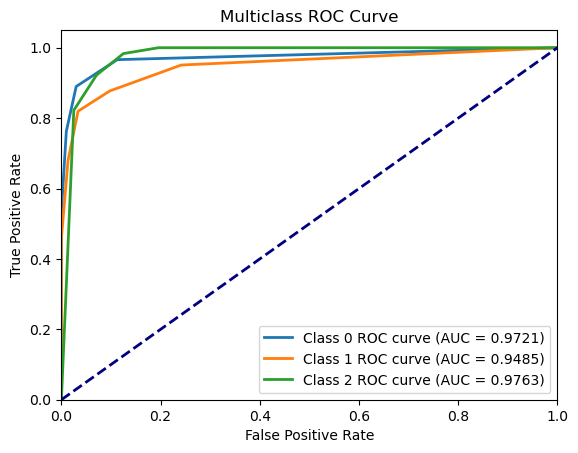

In [416]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.arange(len(np.unique(y_test))))
n_classes = y_test_bin.shape[1]

y_prob = knn.predict_proba(X_test_tr)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

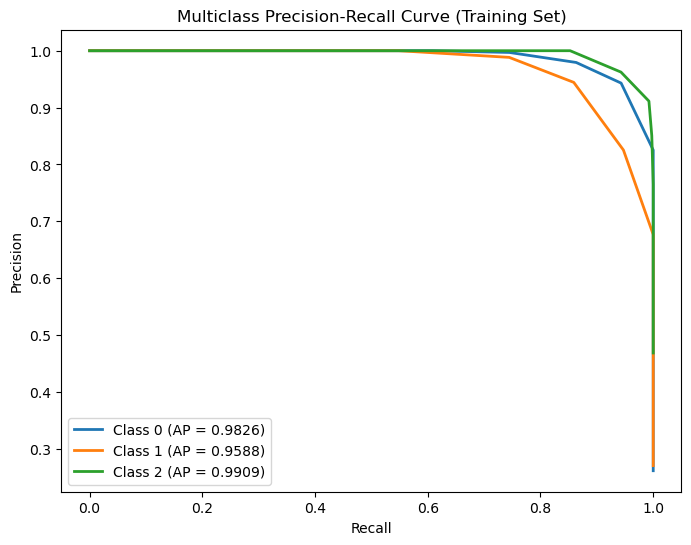

Average Precision for Class 0 (Training Set): 0.9826
Average Precision for Class 1 (Training Set): 0.9588
Average Precision for Class 2 (Training Set): 0.9909


In [417]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_train))
y_train_onehot = label_binarize(y_train, classes=[0, 1, 2])

y_train_score = knn.predict_proba(X_train_tr)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_onehot[:, i], y_train_score[:, i])
    average_precision[i] = average_precision_score(y_train_onehot[:, i], y_train_score[:, i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.4f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (Training Set)")
plt.legend(loc="best")
plt.show()

for i in range(n_classes):
    print(f"Average Precision for Class {i} (Training Set): {average_precision[i]:.4f}")

In [418]:
y_pred = knn.predict(X_train_tr)

print("Classification Report for Train Data:")
print(classification_report(y_train, y_pred, digits=4))

Classification Report for Train Data:
              precision    recall  f1-score   support

           0     0.9751    0.8929    0.9322       439
           1     0.9335    0.8656    0.8983       454
           2     0.9113    0.9924    0.9501       787

    accuracy                         0.9321      1680
   macro avg     0.9400    0.9170    0.9269      1680
weighted avg     0.9340    0.9321    0.9314      1680



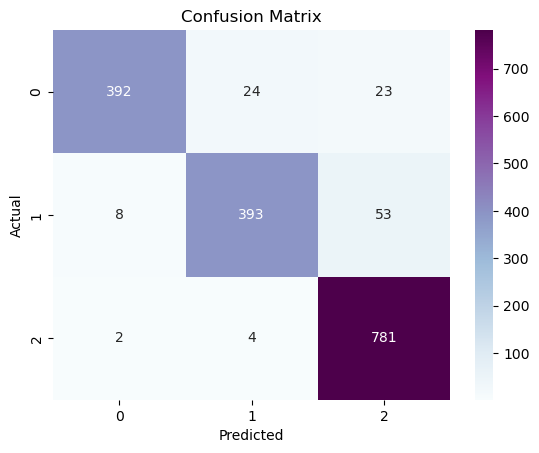

In [419]:
conf_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Testing

In [421]:
y_test_pred = knn.predict(X_test_tr)

print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred, digits=4))

Classification Report for Test Data:
              precision    recall  f1-score   support

           0     0.9608    0.8305    0.8909       118
           1     0.9099    0.8279    0.8670       122
           2     0.8551    0.9833    0.9147       180

    accuracy                         0.8952       420
   macro avg     0.9086    0.8806    0.8909       420
weighted avg     0.9007    0.8952    0.8942       420



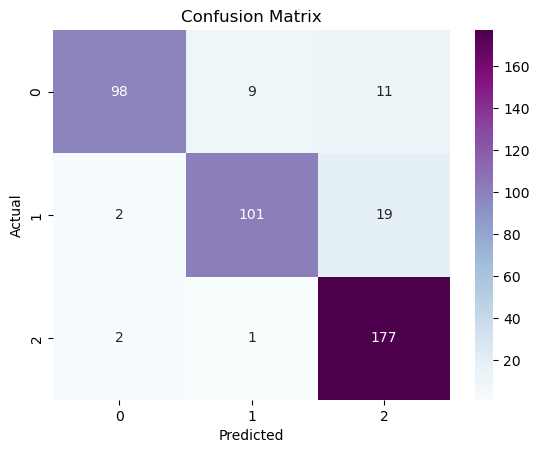

In [422]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

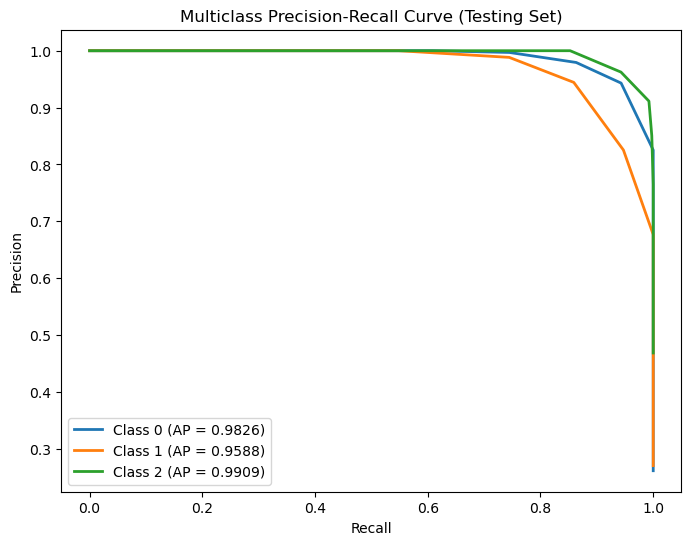

Average Precision for Class 0 (Testing Set): 0.9826
Average Precision for Class 1 (Testing Set): 0.9588
Average Precision for Class 2 (Testing Set): 0.9909


In [423]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))
y_test_onehot = label_binarize(y_test, classes=[0, 1, 2])

y_test_score = knn.predict_proba(X_test_tr)

precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_onehot[:, i], y_train_score[:, i])
    average_precision[i] = average_precision_score(y_train_onehot[:, i], y_train_score[:, i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.4f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multiclass Precision-Recall Curve (Testing Set)")
plt.legend(loc="best")
plt.show()

for i in range(n_classes):
    print(f"Average Precision for Class {i} (Testing Set): {average_precision[i]:.4f}")

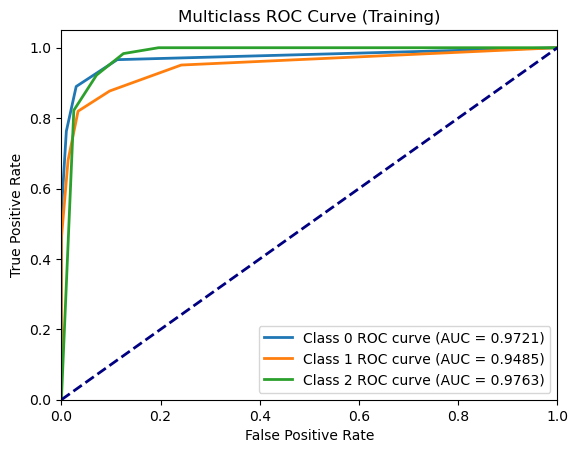

In [424]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_train_bin = label_binarize(y_test, classes=np.arange(len(np.unique(y_train))))
n_classes = y_train_bin.shape[1]

y_prob = knn.predict_proba(X_test_tr)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Training)')
plt.legend(loc="lower right")
plt.show()

## 2.3.2 RANDOM FOREST CLASSIFIER

### Initialize & train Model using Random Forest Model

In [427]:
# Initialize the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, random_state=42)

# Fit the model to the training data
rf_clf.fit(X_train_tr, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

### Model Evaluation

#### Perform Prediction

In [430]:
# Use the Test Cases to do Prediction 
y_pred = rf_clf.predict(X_train_tr)

#### Accuracy

In [432]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print("Training accuracy: {:.4f}".format(accuracy))

Training accuracy: 0.9976


#### Cross-validation (5-fold)

In [434]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.96428571 0.9375     0.93452381 0.94047619 0.94940476]
Mean CV score: 0.9452


In [435]:
# Cross-validation Predict
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(rf_clf, X_train_tr, y_train, cv=5)
y_pred_cv_proba = cross_val_predict(rf_clf, X_train_tr, y_train, cv=5, method = 'predict_proba')

#### Classification Report

In [437]:
# Classification report (Precision + Recall + F1-Score)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_train, y_pred_cv))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       0.94      0.86      0.90       454
           2       0.93      0.97      0.95       787

    accuracy                           0.95      1680
   macro avg       0.95      0.94      0.94      1680
weighted avg       0.95      0.95      0.94      1680



#### Confusion Matrix

Confusion Matrix:
[[438   1   0]
 [  7 390  57]
 [  2  25 760]]


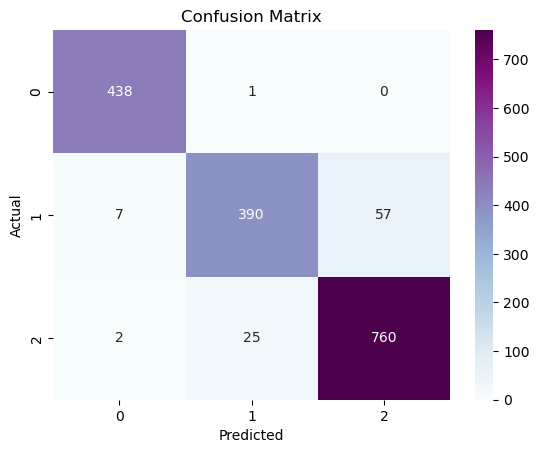

In [439]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve & AUC

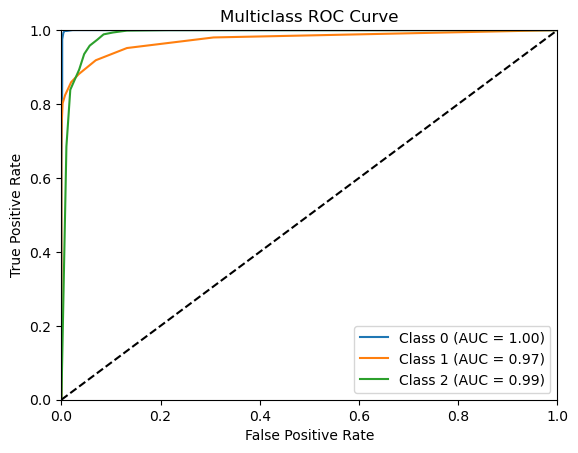

In [441]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output labels (one-vs-rest strategy)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred_cv_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve & AP

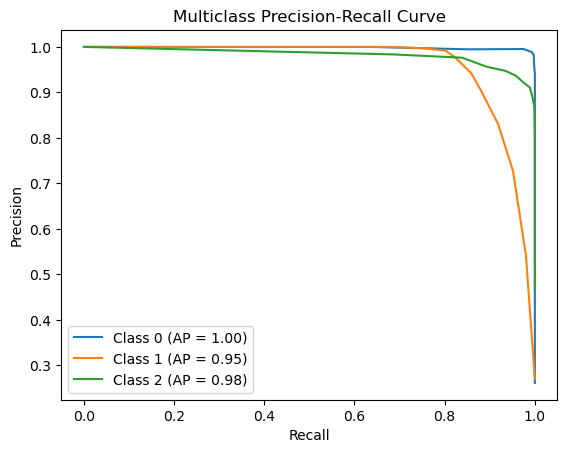

In [443]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

# Compute Precision-Recall and AP for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i],  y_pred_cv_proba[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_pred_cv_proba[:, i])

# Plot the Precision-Recall curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Hyperparameter Tuning (GridSearchCV)

In [445]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Done


#### Best Hyperparameter Settings:

In [447]:
#Output Best Hyperparameter & cross-validation
print("Best Hyperparameters settings found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Use the best estimator found by GridSearchCV
best_rf_clf = grid_search.best_estimator_

Best Hyperparameters settings found:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9595


### Model Evaluation (After Grid Search)

#### Perform Prediction

In [450]:
# Use the Test Cases to do Prediction 
y_pred_tuned = best_rf_clf.predict(X_train_tr)

#### Accuracy

In [452]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_tuned)
print("Training accuracy: {:.4f}".format(accuracy))

Training accuracy: 1.0000


#### Cross-validation (5-fold)

Cross-validattion Predict is done only since grid search already done cross-validation!

Note: Although cross-validation Predict also perform additional cross_validation, changes will be very minimum compare to the cross-validation done in gtid search!

In [455]:
# Cross-validation Predict
from sklearn.model_selection import cross_val_predict

y_pred_cv_tuned = cross_val_predict(best_rf_clf, X_train_tr, y_train, cv=5)
y_pred_cv_proba_tuned = cross_val_predict(best_rf_clf, X_train_tr, y_train, cv=5, method = 'predict_proba')

#### Classification Report

In [457]:
# Classification report (Precision + Recall + F1-Score)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_train, y_pred_cv_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       439
           1       0.96      0.89      0.92       454
           2       0.94      0.98      0.96       787

    accuracy                           0.96      1680
   macro avg       0.96      0.96      0.96      1680
weighted avg       0.96      0.96      0.96      1680



#### Confusion Matrix

Confusion Matrix:
[[438   1   0]
 [  4 404  46]
 [  0  17 770]]


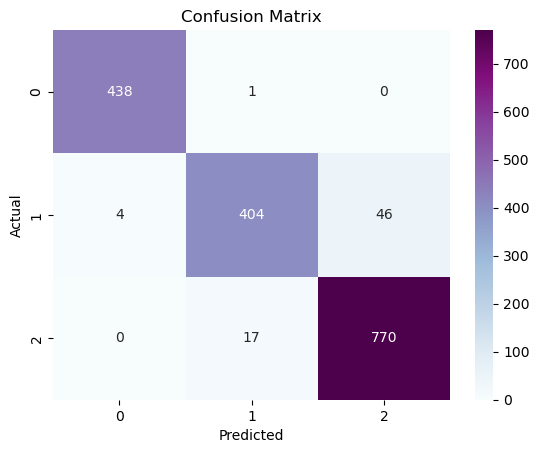

In [459]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv_tuned)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### ROC Curve & AUC

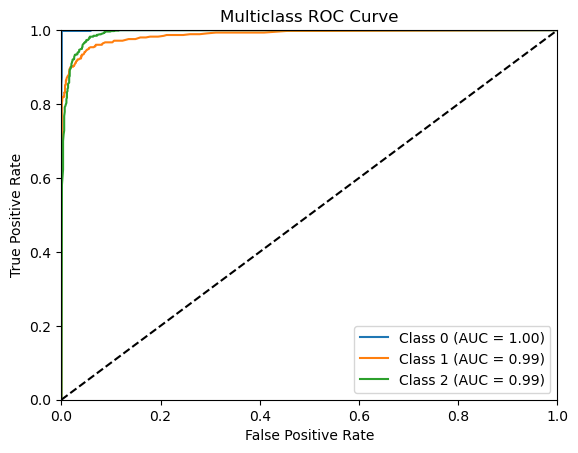

In [461]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output labels (one-vs-rest strategy)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred_cv_proba_tuned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve & AP

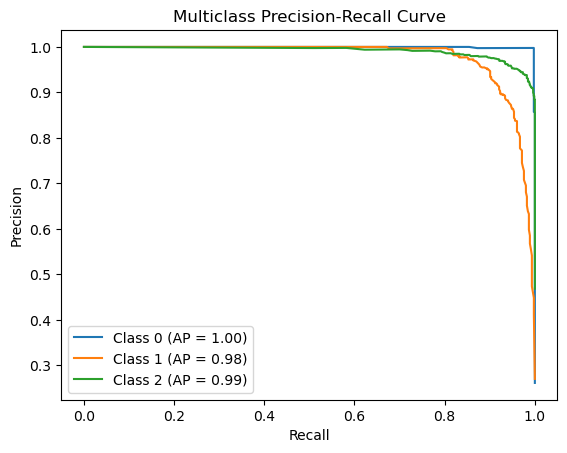

In [463]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

# Compute Precision-Recall and AP for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i],  y_pred_cv_proba_tuned[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_pred_cv_proba_tuned[:, i])

# Plot the Precision-Recall curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Feature Importance

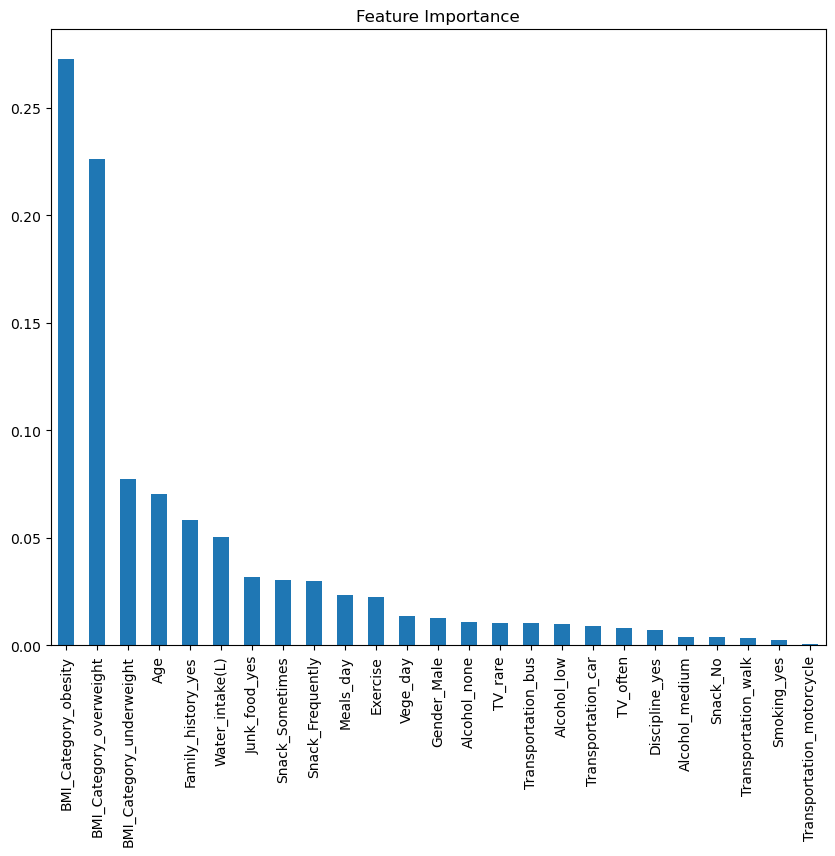

In [465]:
# Get feature importances
importances = best_rf_clf.feature_importances_

# Map feature importances to feature names
feature_importance = pd.Series(importances, (X_train_num.columns.tolist() + X_train_cat_tr.columns.tolist()))

# Sort the feature importances
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Test Model

### Model Evaluation (Test Data)

#### Perform Prediction

In [469]:
# Use the Test Cases to do Prediction 
y_pred = best_rf_clf.predict(X_test_tr)

#### Accuracy

In [471]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.969047619047619


#### Classification Report

In [473]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       0.98      0.91      0.94       122
           2       0.95      0.99      0.97       180

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



#### Confusion Matrix

Confusion Matrix:
[[118   0   0]
 [  1 111  10]
 [  0   2 178]]


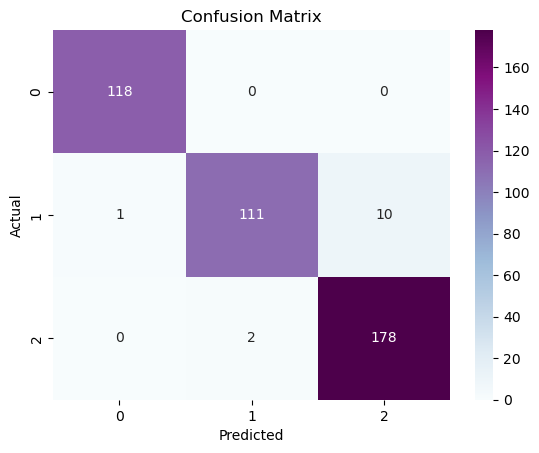

In [475]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2.3.3 Gradient Boosting Classifier

In [477]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd


#### Training the Classifier

In [479]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_tr, y_train)

GradientBoostingClassifier(random_state=42)

#### Performing Predictions on Training Data

In [481]:
# Make predictions
y_pred = gb_clf.predict(X_train_tr)  # Predictions on training data

print("Predictions on the training set:")
print(y_pred[:10])

print("Actual values of the training set:")
print(y_train[:10]) 

Predictions on the training set:
[2 2 2 0 1 1 2 0 2 2]
Actual values of the training set:
1592    2
829     2
414     2
704     0
755     1
1232    1
976     2
393     0
1774    2
968     2
Name: Cardiovascular_risk(y), dtype: int64


#### 5 Fold Cross Validation

In [483]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(gb_clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.97619048 0.93452381 0.94940476 0.95833333 0.94345238]
Mean CV score: 0.9524


#### a) Model Evaluation

In [485]:
# Classification report (precision, recall, f1-score)
train_class_report = classification_report(y_train, y_pred,digits=4)

# Results
print("\nTrain Classification Report:\n", train_class_report)


Train Classification Report:
               precision    recall  f1-score   support

           0     0.9977    1.0000    0.9989       439
           1     0.9976    0.9119    0.9528       454
           2     0.9527    0.9987    0.9752       787

    accuracy                         0.9756      1680
   macro avg     0.9827    0.9702    0.9756      1680
weighted avg     0.9766    0.9756    0.9753      1680



#### b) Confusion Matrix

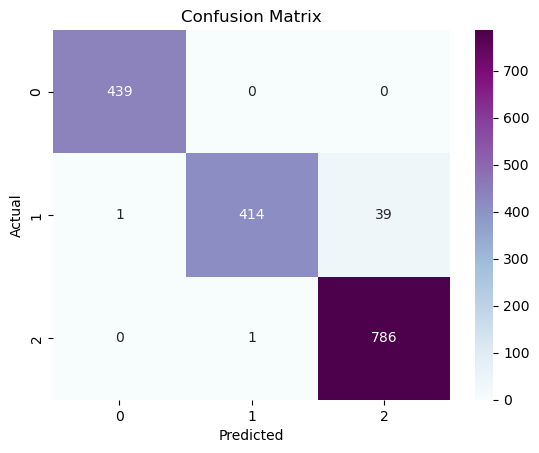

In [487]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### c) ROC AUC Curve

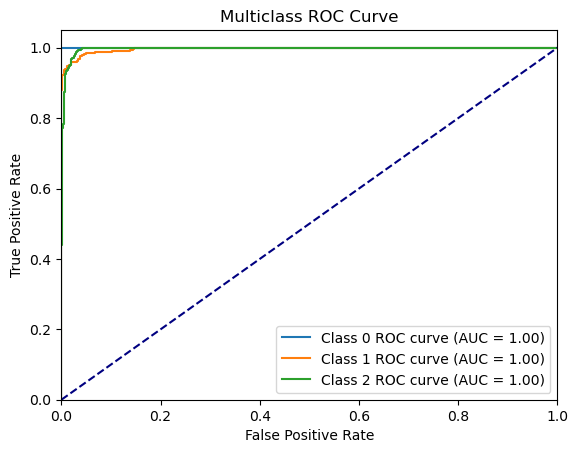

In [489]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_train_bin = label_binarize(y_train, classes=np.arange(len(np.unique(y_train))))
n_classes = y_train_bin.shape[1]

y_train_pred_prob = gb_clf.predict_proba(X_train_tr)
gb_clf.fit(X_train_tr, y_train)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()


#### Precision Recall and Average Precision

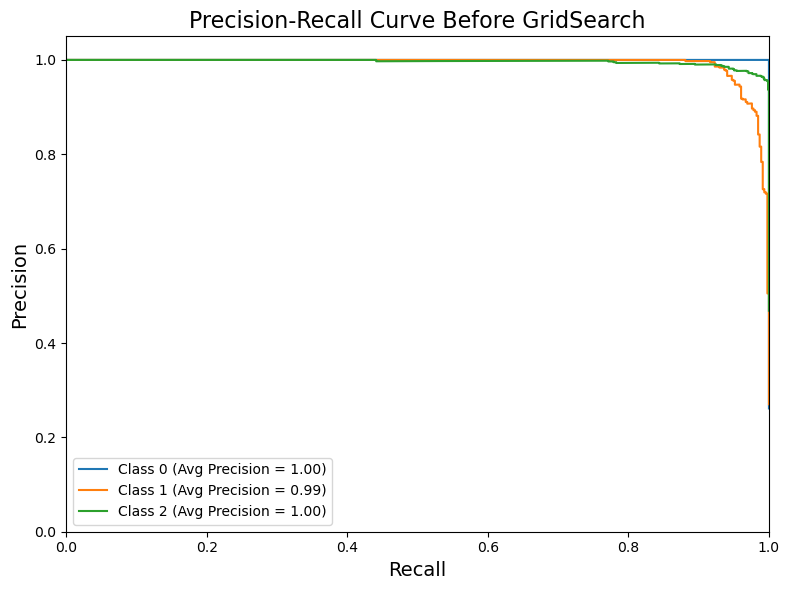

In [491]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass precision-recall
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
n_classes = len(np.unique(y_train))


y_train_bin_score = gb_clf.predict_proba(X_train_tr)

# Initialize dictionaries to store precision, recall, and average_precision for each class
precision = dict()
recall = dict()
average_precision = dict()

# Compute precision-recall curve and average precision score for each class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i], y_train_bin_score[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_train_bin_score[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (Avg Precision = {average_precision[i]:.2f})')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve Before GridSearch', fontsize=16)
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

In [492]:
#### 5 Fold Cross Validation

In [493]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the model
cross_val_results = cross_val_score(gb_clf, X_train_tr, y_train, cv=5)

print("Cross-validation scores:", [f"{score:.4f}" for score in cross_val_results])
print("Average cross-validation score:", f"{np.mean(cross_val_results):.4f}")

Cross-validation scores: ['0.9762', '0.9345', '0.9494', '0.9583', '0.9435']
Average cross-validation score: 0.9524


#### Confusion Matrix in TP,TN,FP,FN 

In [495]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

# Initialize dictionaries to hold TP, TN, FP, FN for each class
TP = {}
TN = {}
FP = {}
FN = {}

# Calculate TP, TN, FP, FN for each class
for i in range(len(conf_matrix)):
    TP[i] = conf_matrix[i, i]
    FP[i] = conf_matrix[:, i].sum() - conf_matrix[i, i]
    FN[i] = conf_matrix[i, :].sum() - conf_matrix[i, i]
    TN[i] = conf_matrix.sum() - (FP[i] + FN[i] + TP[i])

# Display class values
for i in range(len(conf_matrix)):
    print(f"Class {i}:")
    print(f"  True Positives (TP): {TP[i]}")
    print(f"  True Negatives (TN): {TN[i]}")
    print(f"  False Positives (FP): {FP[i]}")
    print(f"  False Negatives (FN): {FN[i]}\n")




Class 0:
  True Positives (TP): 439
  True Negatives (TN): 1240
  False Positives (FP): 1
  False Negatives (FN): 0

Class 1:
  True Positives (TP): 414
  True Negatives (TN): 1225
  False Positives (FP): 1
  False Negatives (FN): 40

Class 2:
  True Positives (TP): 786
  True Negatives (TN): 854
  False Positives (FP): 39
  False Negatives (FN): 1



### Performing GridSearch 

In [497]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, validation_fraction=0.2, n_iter_no_change=10, random_state=42)

# Initialize GridSearchCV with new hyperparameters
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train_tr, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_tr)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation score: 0.9530


In [498]:
# Classification report (precision, recall, f1-score)
train_class_report = classification_report(y_train, y_pred,digits=4)

# Results
print("\nTrain Classification Report:\n", train_class_report)


Train Classification Report:
               precision    recall  f1-score   support

           0     0.9977    0.9977    0.9977       439
           1     0.9821    0.9670    0.9745       454
           2     0.9824    0.9911    0.9867       787

    accuracy                         0.9863      1680
   macro avg     0.9874    0.9853    0.9863      1680
weighted avg     0.9863    0.9863    0.9863      1680



#### Confusion Matric of Training Data After Grid Search

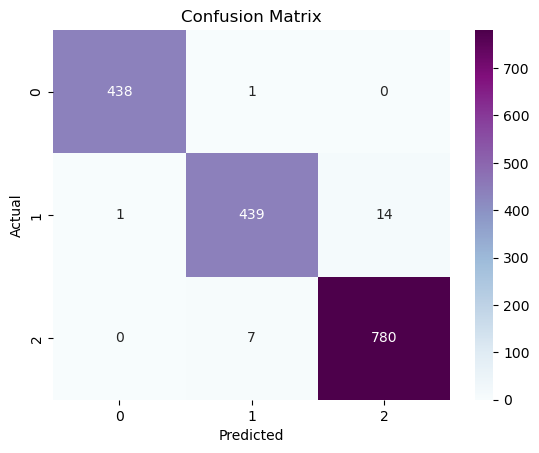

Class 0:
  True Positives (TP): 438
  True Negatives (TN): 1240
  False Positives (FP): 1
  False Negatives (FN): 1

Class 1:
  True Positives (TP): 439
  True Negatives (TN): 1218
  False Positives (FP): 8
  False Negatives (FN): 15

Class 2:
  True Positives (TP): 780
  True Negatives (TN): 879
  False Positives (FP): 14
  False Negatives (FN): 7



In [500]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Initialize dictionaries to hold TP, TN, FP, FN for each class
TP = {}
TN = {}
FP = {}
FN = {}

# Calculate TP, TN, FP, FN for each class
for i in range(len(conf_matrix)):
    TP[i] = conf_matrix[i, i]
    FP[i] = conf_matrix[:, i].sum() - conf_matrix[i, i]
    FN[i] = conf_matrix[i, :].sum() - conf_matrix[i, i]
    TN[i] = conf_matrix.sum() - (FP[i] + FN[i] + TP[i])

# Display class values
for i in range(len(conf_matrix)):
    print(f"Class {i}:")
    print(f"  True Positives (TP): {TP[i]}")
    print(f"  True Negatives (TN): {TN[i]}")
    print(f"  False Positives (FP): {FP[i]}")
    print(f"  False Negatives (FN): {FN[i]}\n")

### Performing Fine Tuning In GridSearch Hyperparameters

In [502]:
from sklearn.metrics import accuracy_score, classification_report

# Three different sets of hyperparameters
param_sets = [
    {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2, 'subsample': 0.8},
    {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'subsample': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1, 'subsample': 0.9}
]


for i, params in enumerate(param_sets):
    # Initialize the Gradient Boosting Classifier with the specific parameters
    gb_clf = GradientBoostingClassifier(**params, validation_fraction=0.2, n_iter_no_change=10, random_state=42)
    
    # Fit the model
    gb_clf.fit(X_train_tr, y_train)

    # Make predictions on the test set
    y_pred = gb_clf.predict(X_test_tr)
    
    # Get the accuracy and classification report
    test_accuracy = accuracy_score(y_test, y_pred)
    test_class_report = classification_report(y_test, y_pred, digits=4)

    # Print results
    print(f"\n### Results for Model {i+1} ###")
    print(f"Hyperparameters: {params}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("\nTest Classification Report:\n", test_class_report)



### Results for Model 1 ###
Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2, 'subsample': 0.8}
Test Accuracy: 0.9381

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9916    1.0000    0.9958       118
           1     1.0000    0.7869    0.8807       122
           2     0.8780    1.0000    0.9351       180

    accuracy                         0.9381       420
   macro avg     0.9565    0.9290    0.9372       420
weighted avg     0.9454    0.9381    0.9363       420


### Results for Model 2 ###
Hyperparameters: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'subsample': 1.0}
Test Accuracy: 0.9500

Test Classification Report:
               precision    recall  f1-score   support

           0     0.9915    0.9915    0.9915       118
           1     0.9720    0.8525    0.9083       122
        

#### 5 Fold Cross Validation

In [504]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the model
cross_val_results = cross_val_score(gb_clf, X_train_tr, y_train, cv=5)
print("Cross-validation scores:", [f"{score:.4f}" for score in cross_val_results])
print("Average cross-validation score:", f"{np.mean(cross_val_results):.4f}")

Cross-validation scores: ['0.9792', '0.9315', '0.9435', '0.9464', '0.9405']
Average cross-validation score: 0.9482


#### ROC AUC Curve of Training Data After Grid Search

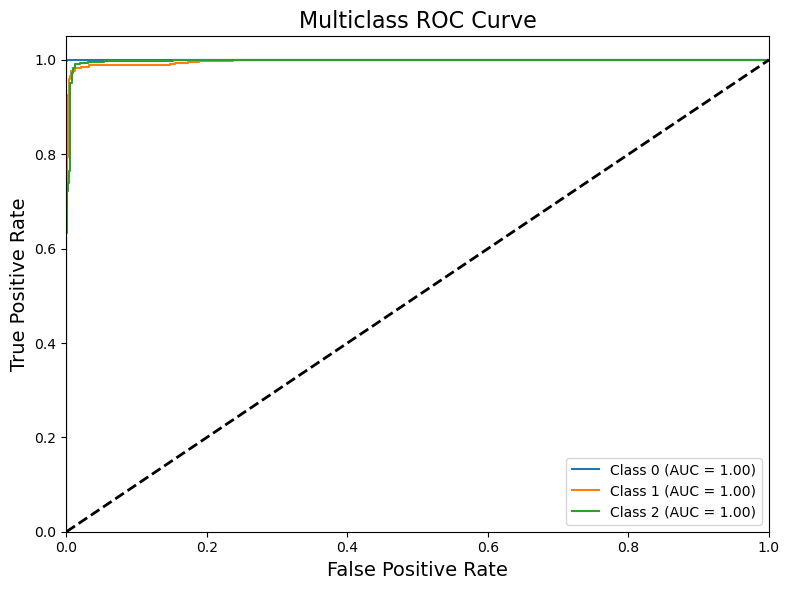

In [506]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the numeric labels for multiclass ROC-AUC
y_train_bin = label_binarize(y_train, classes=[0, 1, 2]) 
n_classes = y_train_bin.shape[1]

y_train_pred_prob = best_model.predict_proba(X_train_tr)  # Predicted probabilities

# Initialize dictionaries 
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the 50% baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multiclass ROC Curve', fontsize=16)
plt.legend(loc="lower right")

# Show plot
plt.tight_layout()
plt.show()


#### Precision Recall Cruve After GridSearch

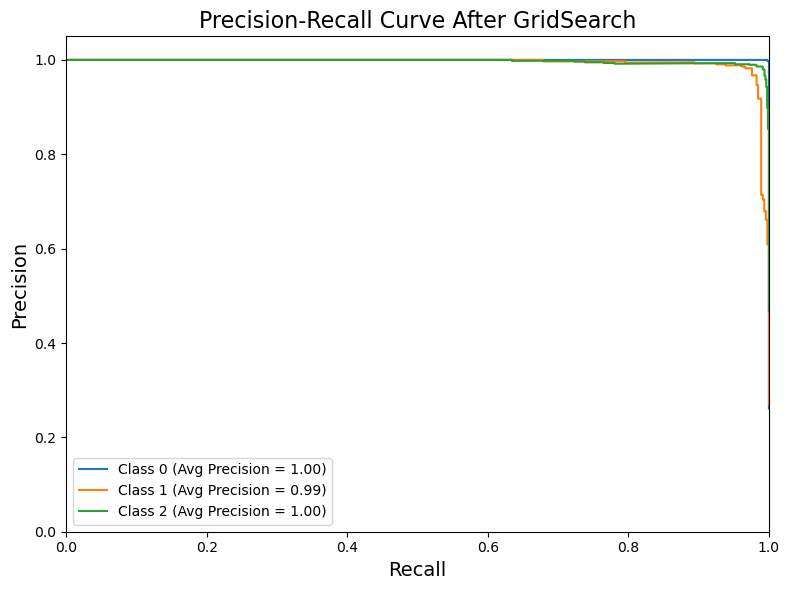

In [508]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_
n_classes = len(np.unique(y_train))  # Use y_test to get the number of classes

# Binarize the output labels for the test data
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])

# Get the predicted probabilities for the test set using the best model
y_train_pred_prob_after = best_model.predict_proba(X_train_tr)

# Initialize dictionaries to store precision, recall, and average_precision for each class
precision_after = dict()
recall_after = dict()
average_precision_after = dict()

# Compute precision-recall curve and average precision score for each class
for i in range(n_classes):
    precision_after[i], recall_after[i], _ = precision_recall_curve(y_train_bin[:, i], y_train_pred_prob_after[:, i])
    average_precision_after[i] = average_precision_score(y_train_bin[:, i], y_train_pred_prob_after[:, i])

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall_after[i], precision_after[i], label=f'Class {i} (Avg Precision = {average_precision_after[i]:.2f})')

# Add labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve After GridSearch', fontsize=16)
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


### Test Data

In [510]:
# Test Cases to do Prediction 
y_pred = best_model.predict(X_test_tr)

In [511]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9547619047619048


In [512]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9915    0.9915    0.9915       118
           1     0.9725    0.8689    0.9177       122
           2     0.9223    0.9889    0.9544       180

    accuracy                         0.9548       420
   macro avg     0.9621    0.9498    0.9546       420
weighted avg     0.9563    0.9548    0.9542       420



#### Confusion Matrix of Test Data

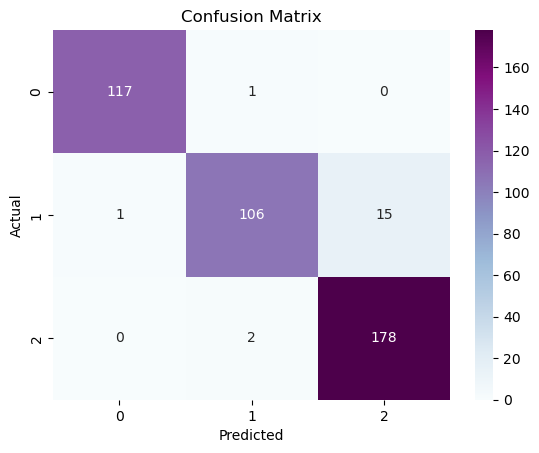

In [514]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [515]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Initialize dictionaries to hold TP, TN, FP, FN for each class
TP = {}
TN = {}
FP = {}
FN = {}

# Calculate TP, TN, FP, FN for each class
for i in range(len(conf_matrix)):
    TP[i] = conf_matrix[i, i]
    FP[i] = conf_matrix[:, i].sum() - conf_matrix[i, i]
    FN[i] = conf_matrix[i, :].sum() - conf_matrix[i, i]
    TN[i] = conf_matrix.sum() - (FP[i] + FN[i] + TP[i])

# Display class values
for i in range(len(conf_matrix)):
    print(f"Class {i}:")
    print(f"  True Positives (TP): {TP[i]}")
    print(f"  True Negatives (TN): {TN[i]}")
    print(f"  False Positives (FP): {FP[i]}")
    print(f"  False Negatives (FN): {FN[i]}\n")


Class 0:
  True Positives (TP): 117
  True Negatives (TN): 301
  False Positives (FP): 1
  False Negatives (FN): 1

Class 1:
  True Positives (TP): 106
  True Negatives (TN): 295
  False Positives (FP): 3
  False Negatives (FN): 16

Class 2:
  True Positives (TP): 178
  True Negatives (TN): 225
  False Positives (FP): 15
  False Negatives (FN): 2



## 2.3.4 XGBoost Classifier

### Intialize and train Model using XGBoost
If cannot run, might be because xgboost is not in the library, if so, please pip install xgboost!

In [518]:
#Create and train Model using XGBoost:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_clf.fit(X_train_tr, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Model Evaluation

#### Perform Prediction

In [521]:
# Use the Test Cases to do Prediction 
y_pred = xgb_clf.predict(X_train_tr)

#### Accuracy

In [523]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", accuracy)

Training Accuracy: 1.0


#### Cross-validation (5-fold)

In [525]:
# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_clf, X_train_tr, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.97619048 0.94345238 0.94940476 0.95833333 0.94345238]
Mean CV score: 0.9542


In [526]:
# Cross-validation Predict

from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(xgb_clf, X_train_tr, y_train, cv=5)
y_pred_cv_proba = cross_val_predict(xgb_clf, X_train_tr, y_train, cv=5, method = 'predict_proba')

#### Classification Report (Precision + Recall + F1-score)

In [528]:
# Classification report (Precision + Recall + F1-Score)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_train, y_pred_cv))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       439
           1       0.95      0.87      0.91       454
           2       0.93      0.98      0.95       787

    accuracy                           0.95      1680
   macro avg       0.96      0.95      0.95      1680
weighted avg       0.95      0.95      0.95      1680



#### Confusion Matrix

Confusion Matrix:
[[438   1   0]
 [  3 396  55]
 [  0  18 769]]


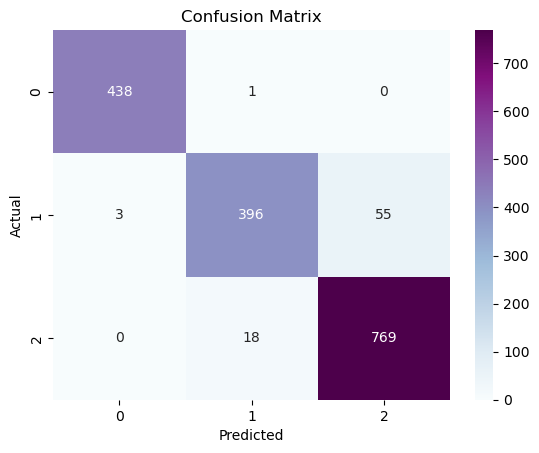

In [530]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_cv)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### ROC Curve & AUC

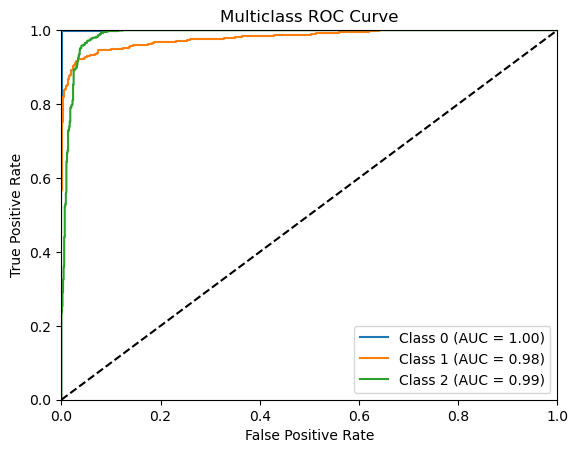

In [532]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarize the output labels (one-vs-rest strategy)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred_cv_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Courve & AP

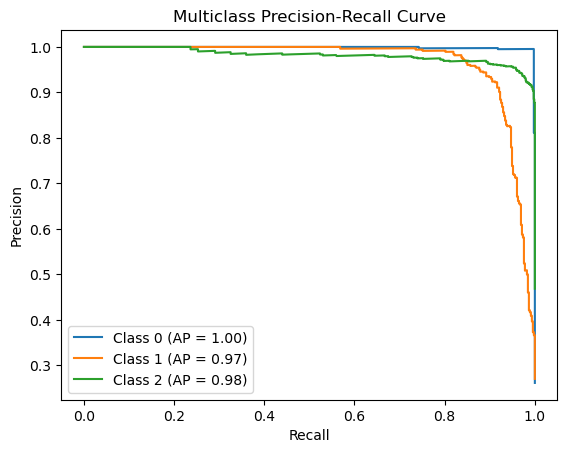

In [534]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

# Compute Precision-Recall and AP for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i],  y_pred_cv_proba[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_pred_cv_proba[:, i])

# Plot the Precision-Recall curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### HyperParameter Tuning (GridSearchCV)

In [536]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.05, 0.1],  # Learning rate
    'subsample': [0.8, 1.0],  # Subsample size
    'colsample_bytree': [0.8, 1.0],  # Feature sampling
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective="multi:softprob", random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

print ('Performing grid search... ', end = '')
grid_search.fit(X_train_tr, y_train)
print('Done')

Performing grid search... Done


#### Best Hyperparameters Settings:

In [538]:
#Output Best Hyperparameter & cross-validation
print("Best Hyperparameters settings found: ", grid_search.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

# Use the best estimator found by GridSearchCV
best_xgb_model = grid_search.best_estimator_

Best Hyperparameters settings found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validation score: 0.9565


### Model Evaluation (After Grid Search)

In [540]:
# Use the Test Cases to do Prediction 
y_pred_tuned = best_xgb_model.predict(X_train_tr)

#### Accuracy

In [542]:
# Calculate Accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred_tuned)
print("Training Accuracy:", accuracy)

Training Accuracy: 0.9952380952380953


#### Cross Validation (5-fold)

Cross-validattion Predict is done only since grid search already done cross-validation!

Note: Although cross-validation Predict also perform additional cross_validation, changes will be very minimum compare to the cross-validation done in gtid search!

In [545]:
# Cross-validation Predict

from sklearn.model_selection import cross_val_predict
y_pred_cv_tuned = cross_val_predict(best_xgb_model, X_train_tr, y_train, cv=5)
y_pred_cv_proba_tuned = cross_val_predict(best_xgb_model, X_train_tr, y_train, cv=5, method = 'predict_proba')

#### Classification Report

In [547]:
# Classification report (Precision + Recall + F1-Score)
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_train, y_pred_cv_tuned))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       439
           1       0.97      0.87      0.92       454
           2       0.93      0.98      0.96       787

    accuracy                           0.96      1680
   macro avg       0.96      0.95      0.96      1680
weighted avg       0.96      0.96      0.96      1680



#### Confusion Matrix

Confusion Matrix:
[[438   1   0]
 [  3 394  57]
 [  0  12 775]]


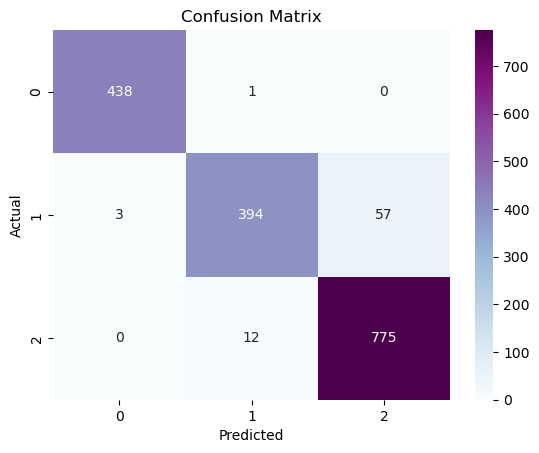

In [549]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_pred_cv_tuned)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### ROC Curve & AUC

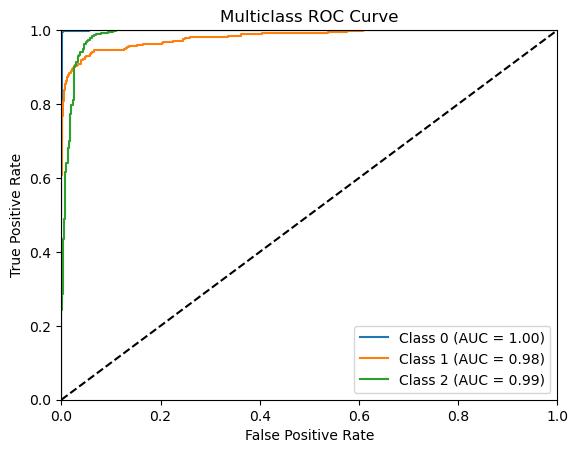

In [551]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Binarize the output labels (one-vs-rest strategy)
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

n_classes = y_train_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_pred_cv_proba_tuned[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Precision-Recall Curve & AP

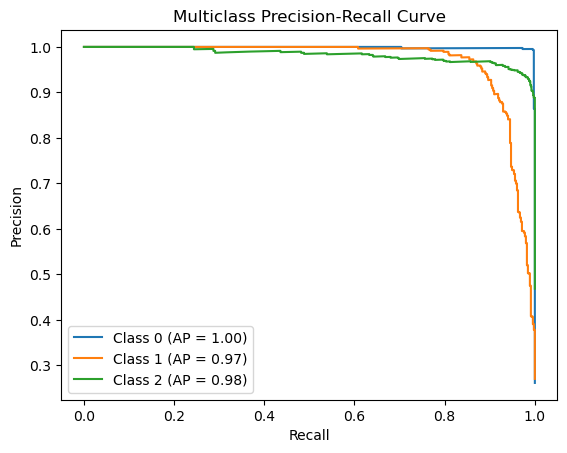

In [553]:
from sklearn.metrics import average_precision_score, precision_recall_curve, auc

# Compute Precision-Recall and AP for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_train_bin[:, i], y_pred_cv_proba_tuned[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_pred_cv_proba_tuned[:, i])

# Plot the Precision-Recall curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### Feature Importance

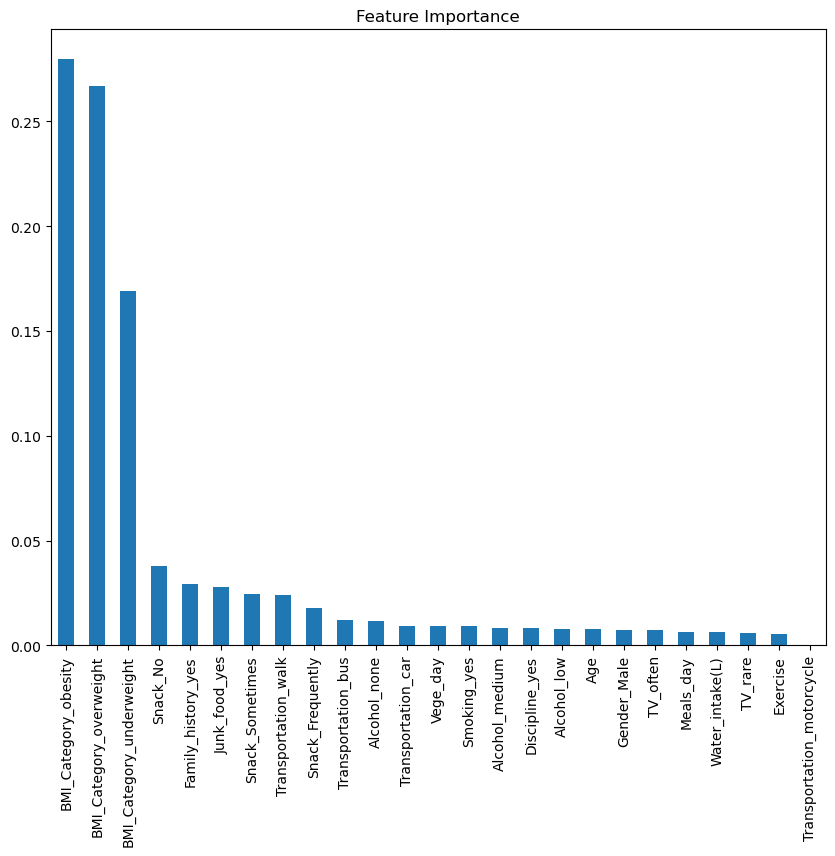

In [555]:
# Get feature importances
importances = best_xgb_model.feature_importances_

# Map feature importances to feature names
feature_importance = pd.Series(importances, (X_train_num.columns.tolist() + X_train_cat_tr.columns.tolist()))

# Sort the feature importances
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

## Test Model

In [557]:
# Use the Test Cases to do Prediction 
y_pred = best_xgb_model.predict(X_test_tr)

### Model Evaluation (Test Data)

#### Accuracy

In [560]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9523809523809523


#### Classification Report

In [562]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       0.98      0.85      0.91       122
           2       0.91      0.99      0.95       180

    accuracy                           0.95       420
   macro avg       0.96      0.95      0.95       420
weighted avg       0.95      0.95      0.95       420



#### Confusion Matrix

Confusion Matrix:
[[118   0   0]
 [  1 104  17]
 [  0   2 178]]


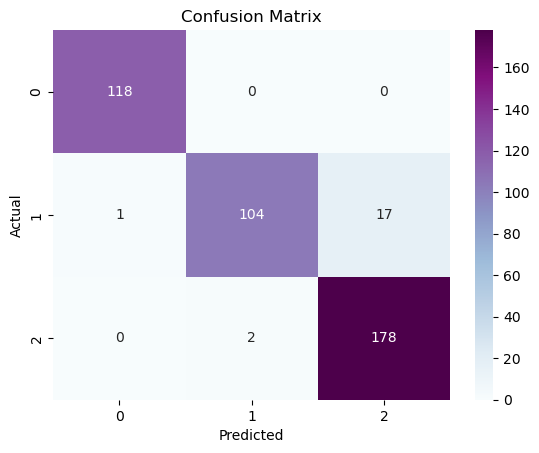

In [564]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix Graph
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
